# Support Vector Machine (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.

- Still effective in cases where number of dimensions is greater than the number of samples.

- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

# Boiler

Steam is generated by heat from the combustion of fuel in a furnace, or by waste heat from a process. The heat is transferred to water in the boiler shell, which then evaporates to produce steam under pressure. A certain area of water surface is required in a boiler from which to release the steam.
- 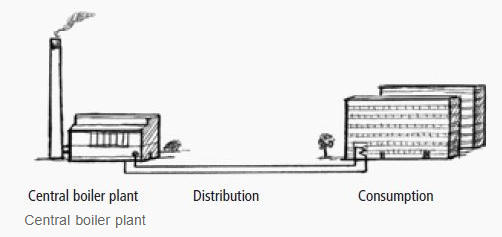

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('boiler.csv')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

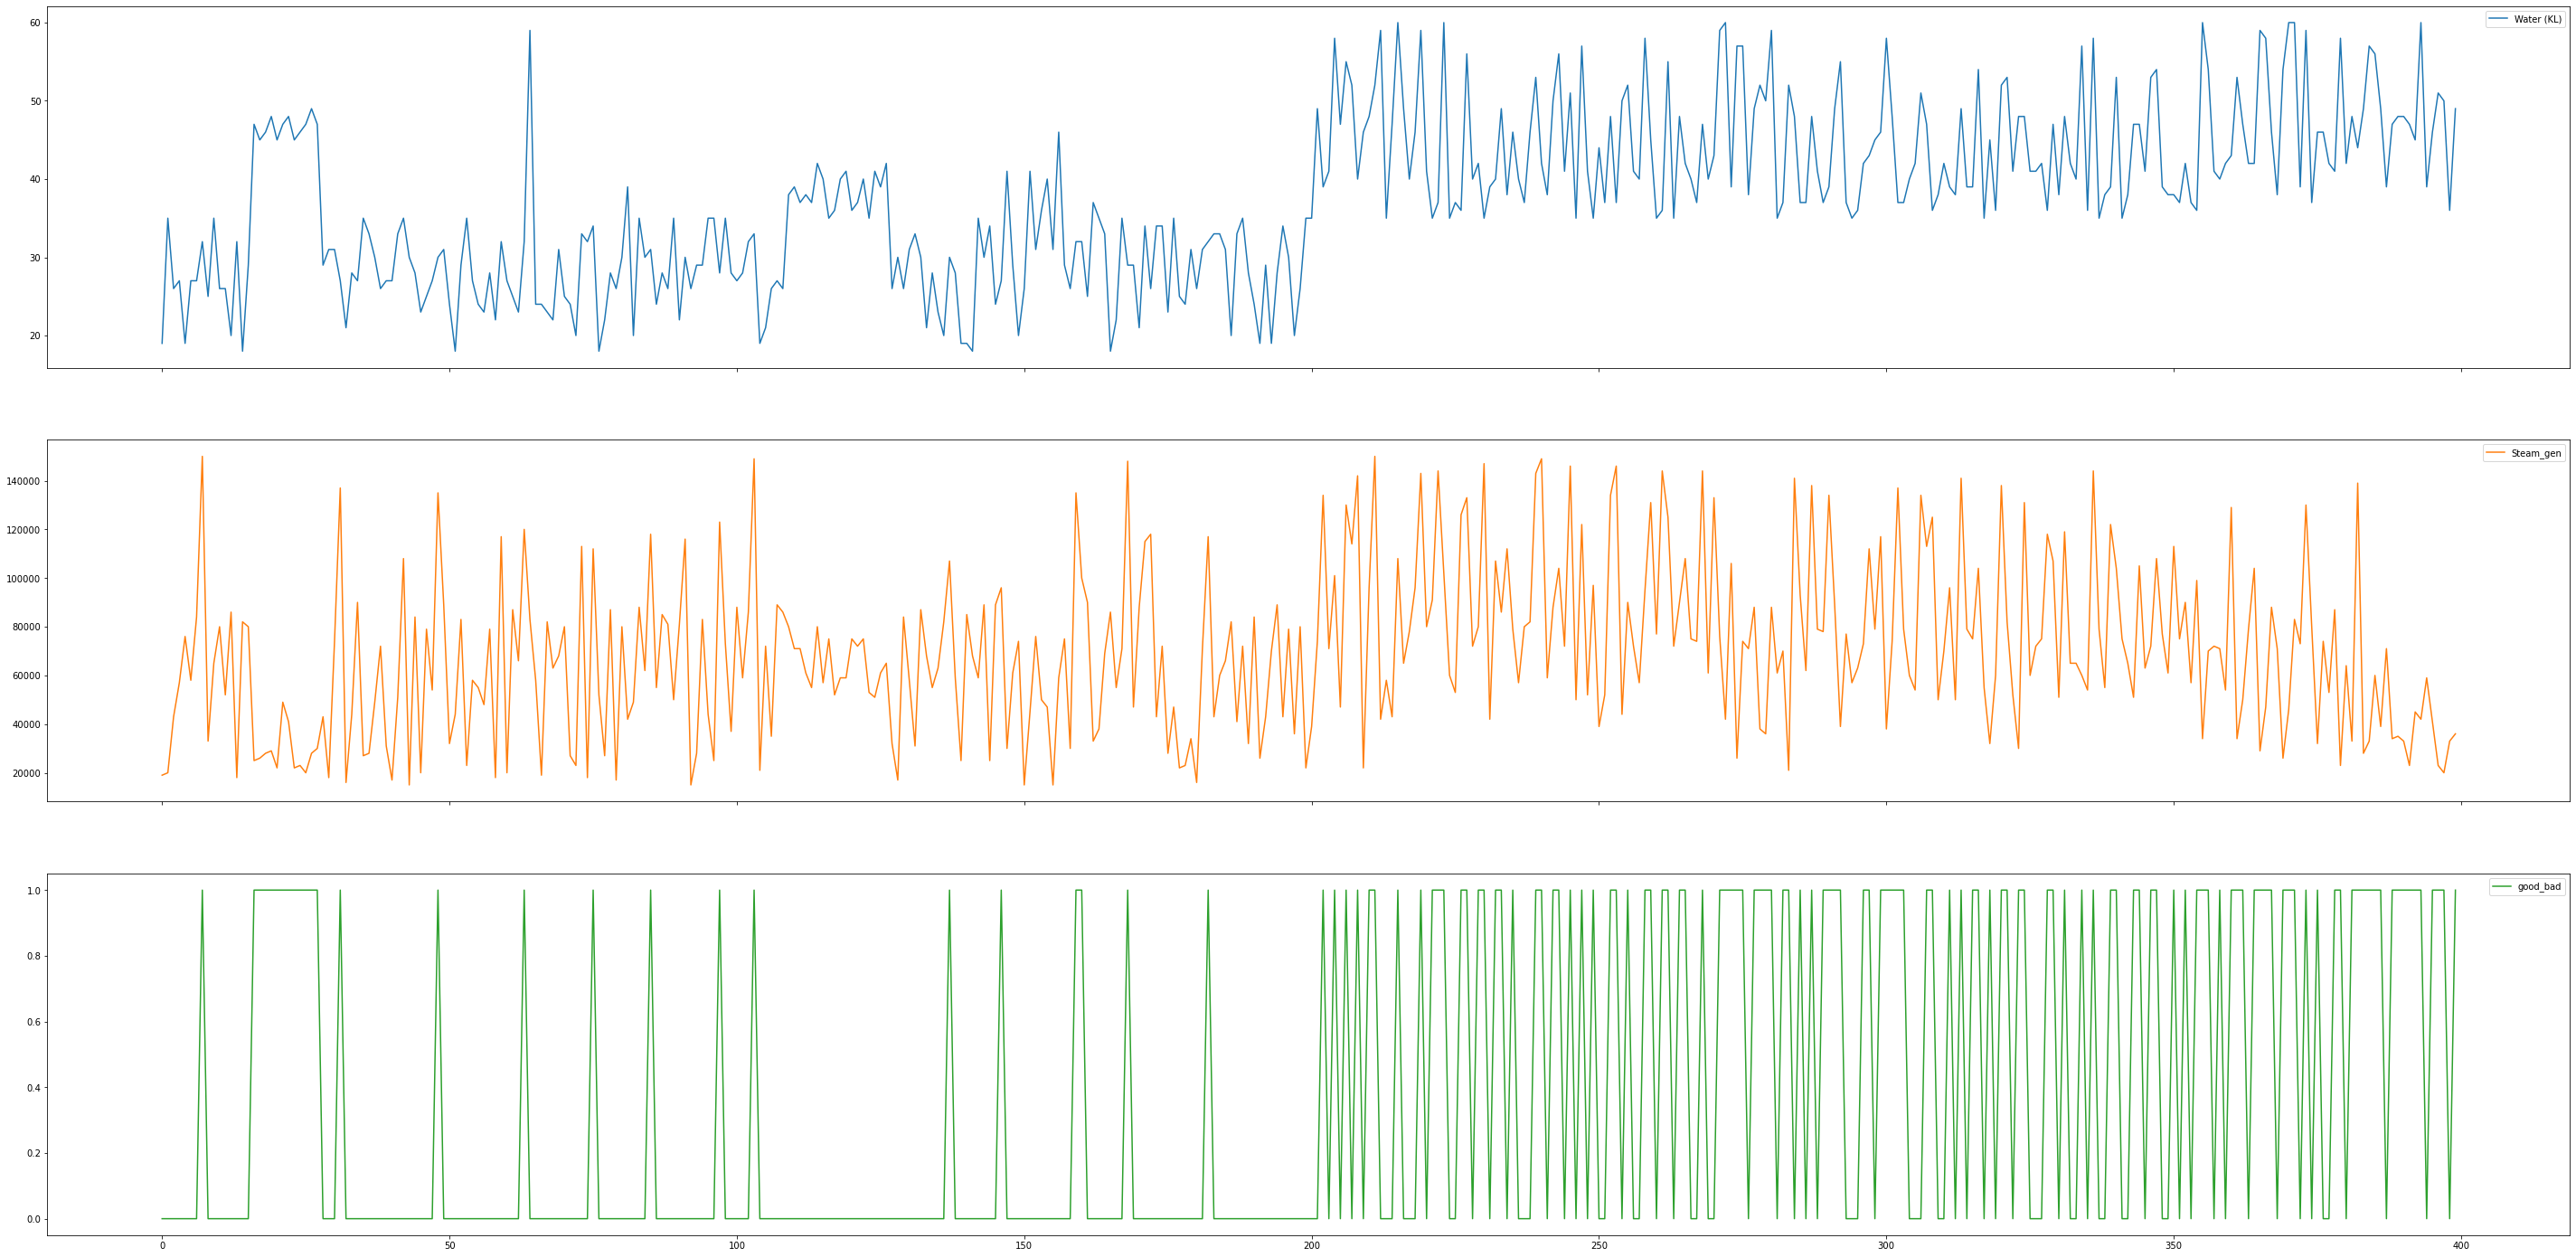

In [3]:
dataset.plot(subplots=True, figsize=(50,25))

Boiler water consumption:

Boilers are an important component for heating applications. They are common in industries such as power plants, chemical processing, food and beverage processing industry, heating engineering, building materials. Water is the most common fluid used in heating processes, due to its availability and high heat capacity. These uses require large amounts of water and often present potential for water saving. This savings result in lower water and sewer bills and decreased treatment costs.
- 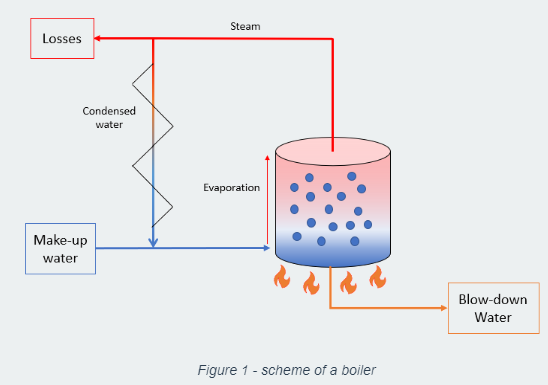


Read more: https://www.lenntech.com/applications/process/boiler-feed-water/boiler-water-consumption.htm#ixzz7tsPujHYF

In [4]:
dataset.columns

Index(['Water (KL)', 'Steam_gen', 'good_bad'], dtype='object')

## Splitting the dataset into the Training set and Test set

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=False)

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the SVM model on the Training set

In [8]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'poly')
classifier.fit(X_train, y_train)

SVC(kernel='poly')

## Predicting the Test set results

In [9]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[44  2]
 [21 53]]


0.8083333333333333

## Visualising the Test set results

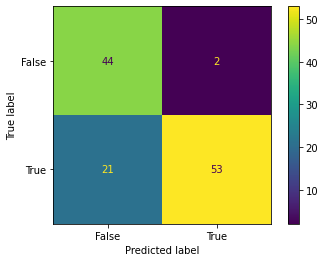

In [11]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

The Confusion Matrix created has four different quadrants:

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)
- True means that the values were accurately predicted, 
- False means that there was an error or wrong prediction.

Created Metrics
The matrix provides us with many useful metrics that help us to evaluate out classification model.

The different measures include: Accuracy, Precision, Sensitivity (Recall), Specificity, and the F-score, explained below.

Accuracy
Accuracy measures how often the model is correct.
- (True Positive + True Negative) / Total Predictions

In [16]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

0.8083333333333333

Precision of the positives predicted, what percentage is truly positive?

- True Positive / (True Positive + False Positive)

In [18]:
Precision = metrics.precision_score(y_test, y_pred)
Precision

0.9636363636363636

Sensitivity (Recall)

- True Positive / (True Positive + False Negative)

Sensitivity is good at understanding how well the model predicts something is positive:

In [20]:
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Sensitivity_recall

0.7162162162162162

Specificity

- True Negative / (True Negative + False Positive)

In [22]:
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
Specificity

0.9565217391304348

F-score
F-score is the "harmonic mean" of precision and sensitivity.

- 2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

This score does not take into consideration the True Negative values:

In [24]:
F1_score = metrics.f1_score(y_test, y_pred)
F1_score

0.8217054263565892

# All in one

In [26]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,
       "Specificity":Specificity,"F1_score":F1_score})


{'Accuracy': 0.8083333333333333, 'Precision': 0.9636363636363636, 'Sensitivity_recall': 0.7162162162162162, 'Specificity': 0.9565217391304348, 'F1_score': 0.8217054263565892}
